In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
from cmcrameri import cm
import cartopy.feature as cf
import cartopy.crs as ccrs
shp_pan = gpd.read_file(r'Data\shapefiles\panamz.geojson')


In [2]:
bacias = gpd.read_file(r'Data\shapefiles\ANA_nivel2.geojson')

<AxesSubplot: >

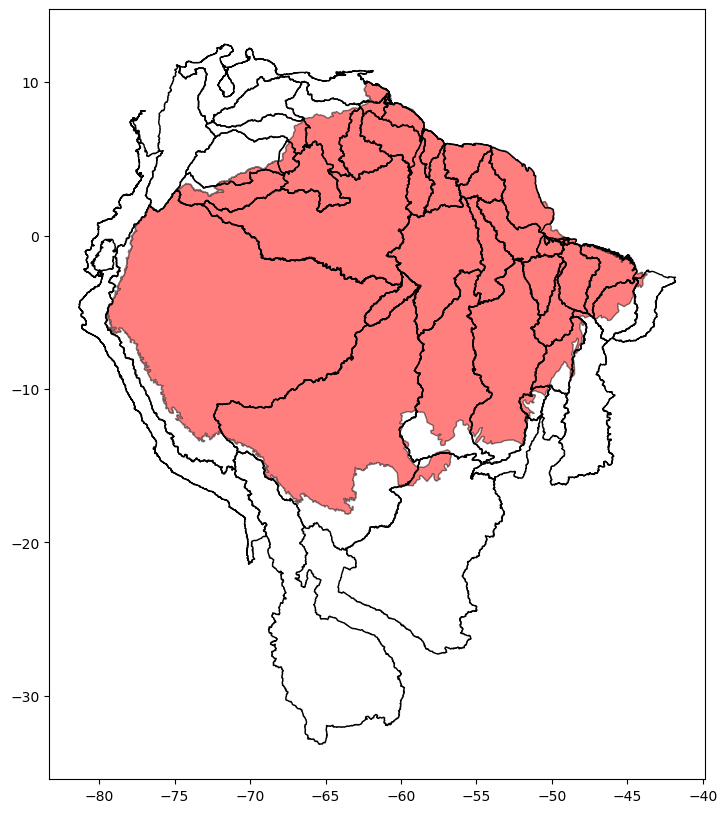

In [3]:
#select only bacias inside panamz
bacias = bacias[bacias.intersects(shp_pan.geometry[0])].reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10, 10))
shp_pan.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
bacias.plot(ax=ax, color='none', edgecolor='black')



<AxesSubplot: >

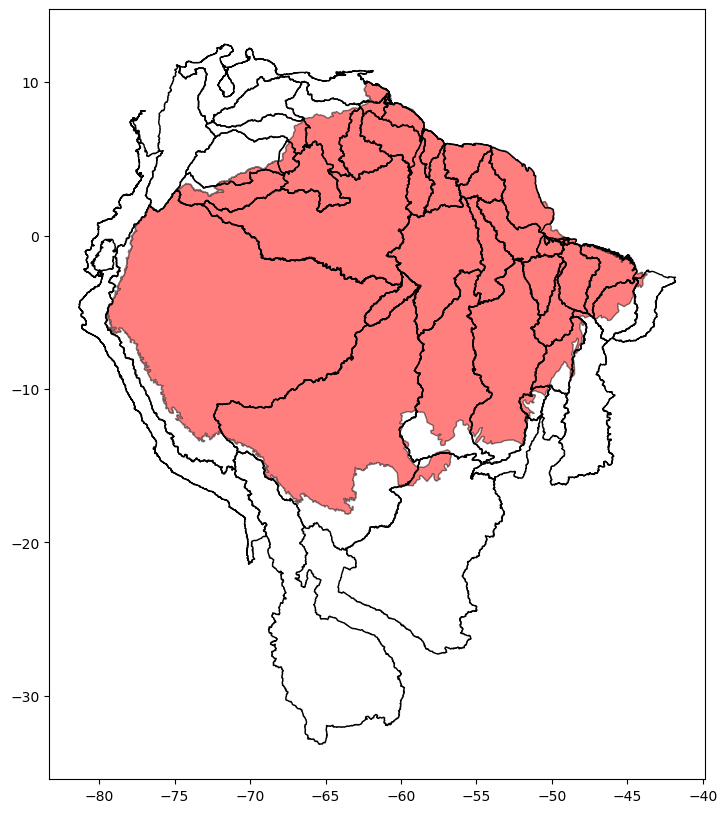

In [4]:
#plot the bacias and the OBJECTID in the middel of geometry
fig, ax = plt.subplots(figsize=(10, 10))
shp_pan.plot(ax=ax, color='red', edgecolor='black', alpha=0.5)
bacias.plot(ax=ax, color='none', edgecolor='black')
#for i, txt in enumerate(bacias['OBJECTID']):
#    ax.annotate(txt, (bacias.iloc[i].geometry.centroid.x, bacias.iloc[i].geometry.centroid.y), ha='center', fontsize=12, color='green')

In [5]:
west = [3,5,8,34,36]
south = [31, 33, 67, 72]
north = [9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24, 25, 32,35]
east = [26, 27,28, 29, 30, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57]

In [6]:
#create a Region column in bacia, with west, south, north, east as objectID
bacias['Region'] = np.nan
bacias.loc[bacias['OBJECTID'].isin(west), 'Region'] = 'Western'
bacias.loc[bacias['OBJECTID'].isin(south), 'Region'] = 'Southern'
bacias.loc[bacias['OBJECTID'].isin(north), 'Region'] = 'Northern'
bacias.loc[bacias['OBJECTID'].isin(east), 'Region'] = 'Eastern'
 

<AxesSubplot: >

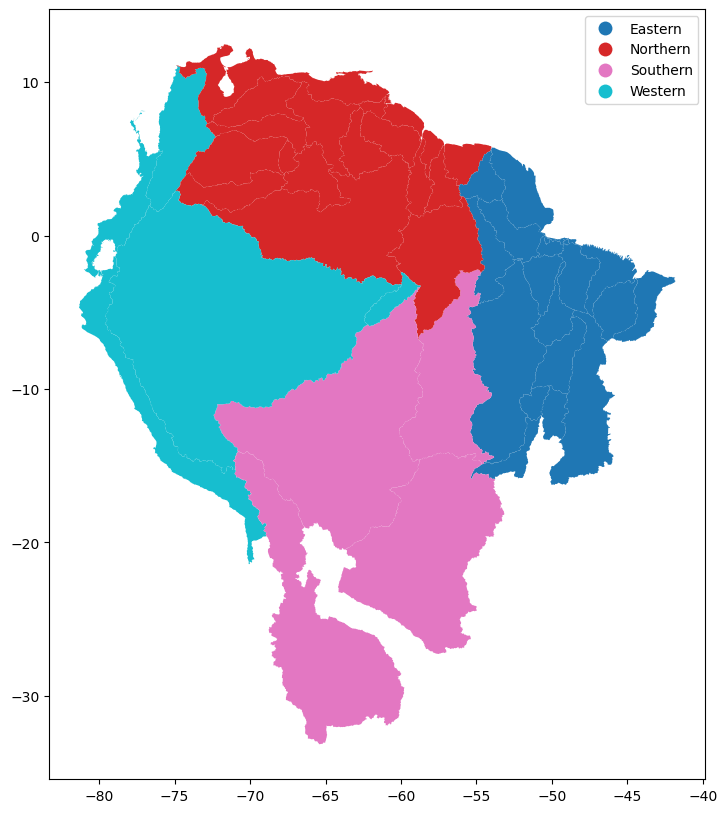

In [7]:
bacias.plot(column='Region', legend=True, figsize=(10,10))

In [8]:
bacias_regions = bacias.dissolve(by='Region').reset_index()
#clip bacias_regions in shp_pan
bacias_amz = gpd.clip(bacias_regions.to_crs(shp_pan.crs), shp_pan)

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

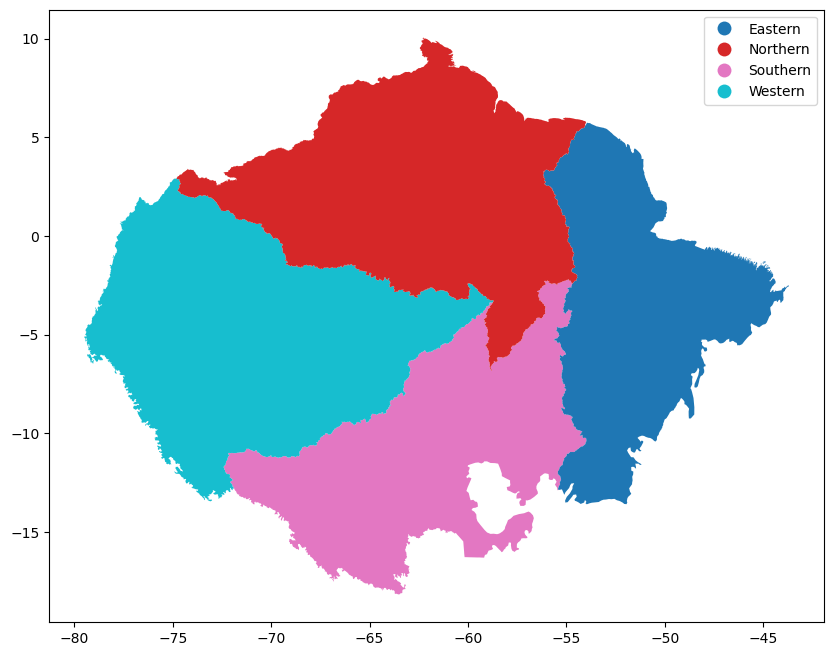

In [9]:
bacias_amz.plot(column='Region', legend=True, figsize=(10,10))

In [10]:
#bacias_amz.to_file(r'Data\shapefiles\ANA_amz.geojson', driver='GeoJSON')

In [4]:
#stations geodataframe
bacias_amz = gpd.read_file(r'Data\shapefiles\ANA_amz.geojson')
gdf = gpd.read_file(r'Data\stations_all.geojson')
# rainfall cleaned data
df_bet= pd.read_pickle('Data\ALL_01_20_20bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_bet.Code.unique())].to_crs(shp_pan.crs)
#spatial join gdf_filtered and bacias_amz
gdf_filtered = gpd.sjoin(gdf_filtered, bacias_amz[['Region', 'geometry']], how='inner', op='intersects')


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot: >

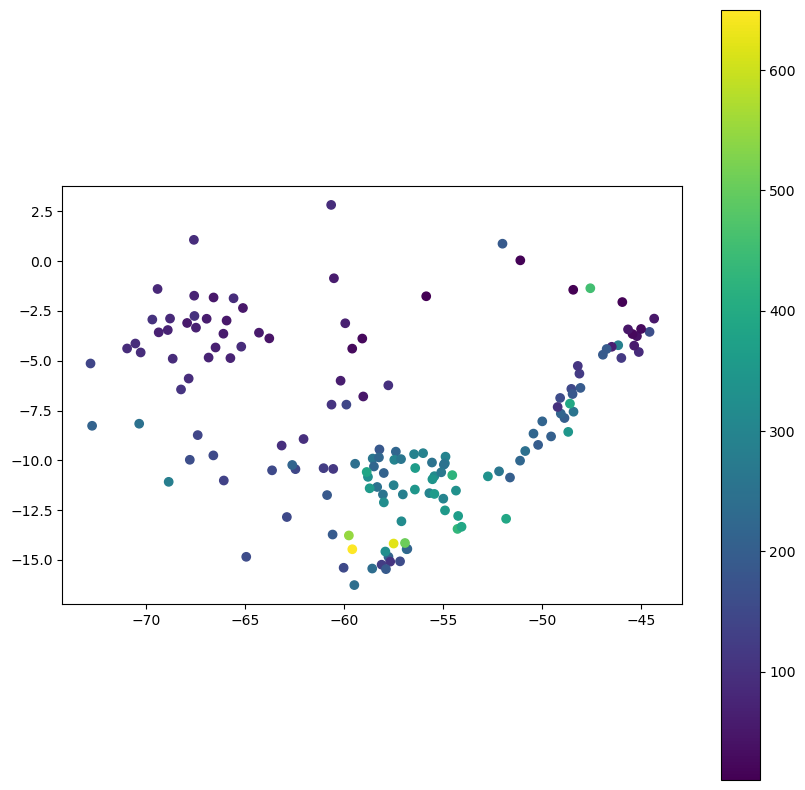

In [8]:
gdf_filtered.plot(column='Altitude', legend=True, figsize=(10,10))

In [12]:
#gdf_filtered.to_file(r'Data\Evaluation\stations_amz_ANA.geojson', driver='GeoJSON')
df_amz = df_bet[df_bet.Code.isin(gdf_filtered.Code.unique())]
#df_amz.to_pickle(r'Data\Evaluation\amz_01_20_20bet.pkl')

In [13]:
gdf_filtered.groupby('Region').count()

,Code,Name,Latitude,Longitude,Date_begin,Date_end,geometry,index_right
Region,,,,,,,,
Eastern,162,162,162,162,162,162,162,162
Northern,110,82,110,110,110,110,110,110
Southern,133,133,133,133,133,133,133,133
Western,176,99,176,176,176,176,176,176


<AxesSubplot: >

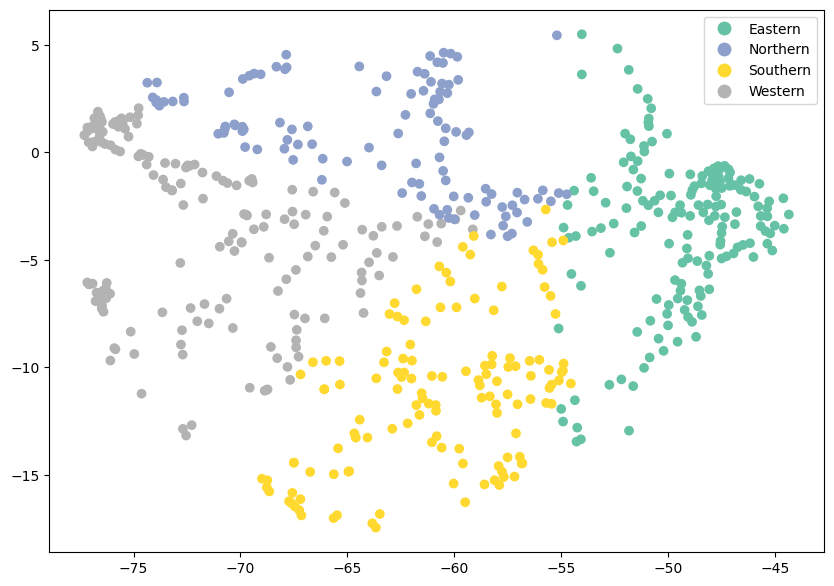

In [14]:
gdf_filtered.plot(column='Region', cmap='Set2', legend=True, figsize=(10,10))

# plots

In [15]:
import regionmask
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

from matplotlib.lines import Line2D
pal = sns.color_palette("Dark2")
#create a list from pal with the following index: 0,2,5,7
pal = [pal[i] for i in [0,2,5,7]]
regions_list_x = ['Eastern', 'Northern', 'Southern', 'Western']
legend_elements = [Line2D([0], [0],  marker='s', color='w', label=regions_list_x[i], markerfacecolor=pal[i], markersize=12) for i in range(len(pal))]
#clip bacias in shp_amz
bacias_clip = gpd.clip(bacias.to_crs(shp_pan.crs), shp_pan)

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


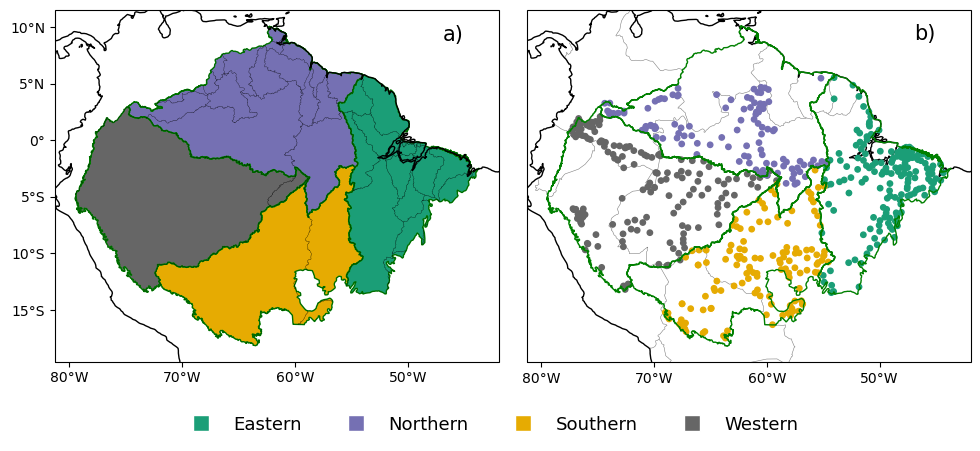

In [16]:
my_proj = ccrs.PlateCarree()
#plot stations
fig, axs = plt.subplots(1, 2,
        figsize=[10, 8], subplot_kw={"projection": my_proj}, sharey=True)
plt.rcParams.update({'font.size': 13})
bacias_amz.plot(ax=axs[0], edgecolor='green',column='Region', cmap=mpl.colors.ListedColormap(pal))
bacias_clip.plot(ax=axs[0], edgecolor='black', facecolor='none', linewidth=0.1)
#regions_mask.plot(label='abbrev',ax=axs[0])
axs[0].coastlines(resolution="50m", linewidth=1, color='black')
axs[1].add_feature(cf.BORDERS, linewidth=0.4, color='grey')
axs[1].coastlines(resolution="50m", linewidth=1, color='black')
bacias_amz.plot(ax=axs[1], edgecolor='green', facecolor='none', zorder=20)
gdf_filtered.plot(ax=axs[1],  markersize=15, column='Region',  cmap=mpl.colors.ListedColormap(pal), zorder=10)
axs[0].xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axs[0].yaxis.set_major_formatter(LATITUDE_FORMATTER)
axs[1].xaxis.set_major_formatter(LONGITUDE_FORMATTER)
axs[1].yaxis.set_major_formatter(LATITUDE_FORMATTER)
axs[0].set_xticks(np.arange(-80, -40, 10))
axs[0].set_yticks(np.arange(-20, 11, 5))
#axs[1].set_yticks(np.arange(-20, 11, 5))
axs[1].set_xticks(np.arange(-80, -40, 10))

axs[0].text(0.92,0.96, 'a)', transform=axs[0].transAxes, fontsize=15, va='top', ha='right')
axs[1].text(0.92,0.96, 'b)', transform=axs[1].transAxes, fontsize=15, va='top', ha='right')

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, 0.17), loc='lower center', ncol=4, frameon=False)
plt.tight_layout()

# NA

In [18]:
start = '2001-01-01'
end = '2020-12-31'
na = 20
frame = pd.read_pickle(r'Data\all_clean.pkl')
date_begin = start
date_end = end

In [19]:

#selectt data in frame in start-end period
frame_dates = frame[(frame['Date'] >= start) & (frame['Date'] <= end)]
date_range = pd.date_range(start = date_begin, end = date_end, freq='MS' )
codes = frame_dates['Code'].unique()
df_na = frame_dates.dropna()
diff_list = []
for code in codes:
    diff = date_range.difference(df_na[df_na['Code']==code]['Date'])
    diff_list.append(len(diff))
difs_date_series = pd.Series(diff_list, index=codes)
values_na = difs_date_series / len(date_range) *100
df_na = values_na.reset_index(name='na').rename(columns={'index':'Code'})

In [33]:
gdf_filtered = gdf_filtered.merge(df_na, on='Code')

<AxesSubplot: >

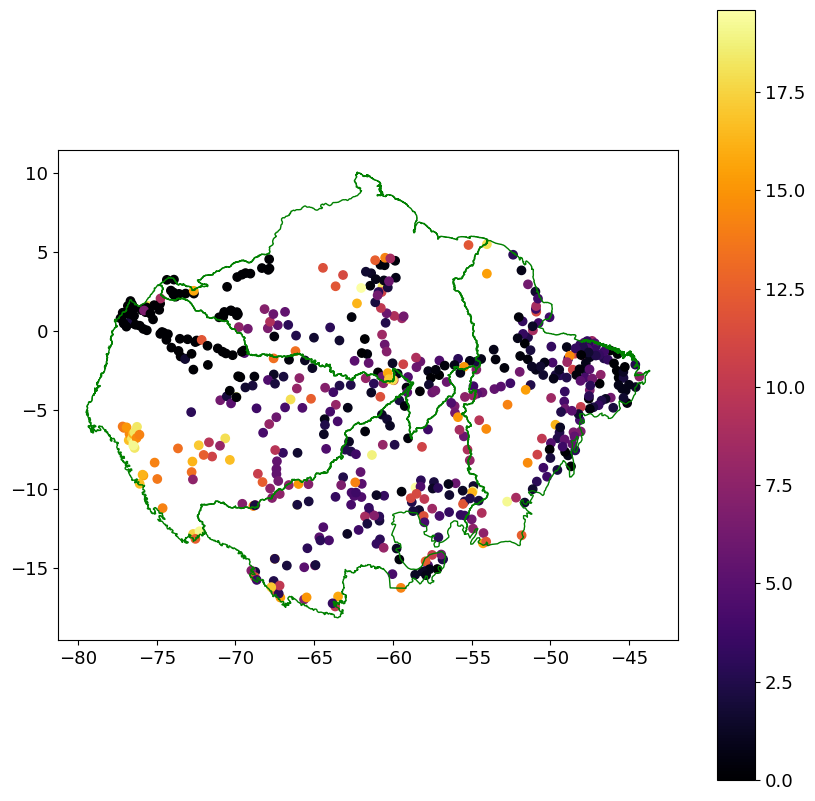

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_filtered.plot(column='na', cmap='inferno', legend=True, ax=ax)
bacias_amz.plot(ax=ax, edgecolor='green', facecolor='none', zorder=20)
